### Create aligned temporal cortex masks

note: this requires that the 3mm resolution boldref files have been generated using data_setup_haxby.ipynb

In [1]:
### align vt mask for each subject with fmriprepped data
import os
from nilearn import datasets
from pathlib import Path
import nibabel as nib
import bids
from poldracklab.utils.run_shell_cmd import run_shell_cmd
import numpy as np
# First, we fetch single subject specific data with haxby datasets: to have
# anatomical image, EPI images and masks images
haxby_dataset = datasets.fetch_haxby(subjects=list(range(1, 7)))
haxby_datadir = Path(os.path.dirname(haxby_dataset.mask))

data_dir = "/Users/poldrack/data_unsynced/ds000105"
derivdir = Path(data_dir) / "derivatives/vtmasks"
layout = bids.BIDSLayout(data_dir)



[get_dataset_dir] Dataset found in /Users/poldrack/nilearn_data/haxby2001


In [2]:
maskfiles = list(haxby_datadir.glob('sub*/mask4_vt.nii.gz'))
maskfiles.sort()
maskfiles

[PosixPath('/Users/poldrack/nilearn_data/haxby2001/subj1/mask4_vt.nii.gz'),
 PosixPath('/Users/poldrack/nilearn_data/haxby2001/subj2/mask4_vt.nii.gz'),
 PosixPath('/Users/poldrack/nilearn_data/haxby2001/subj3/mask4_vt.nii.gz'),
 PosixPath('/Users/poldrack/nilearn_data/haxby2001/subj4/mask4_vt.nii.gz'),
 PosixPath('/Users/poldrack/nilearn_data/haxby2001/subj5/mask4_vt.nii.gz'),
 PosixPath('/Users/poldrack/nilearn_data/haxby2001/subj6/mask4_vt.nii.gz')]

In [3]:
res = 3 # resampling resolution in mm

for maskfile in maskfiles:
    subject = int(maskfile.parts[-2].replace('subj',''))
    
    print(subject)
    maskimg = nib.load(str(maskfile))

    boldfiles = layout.get(suffix='bold', extension='nii.gz', run=1, subject=subject,
                            return_type='file')
    assert len(boldfiles) == 1
    boldimg = nib.load(boldfiles[0])

    maskimg_resampled = nib.Nifti1Image(maskimg.get_fdata(), boldimg.affine, boldimg.header)

    maskfile_resampled = derivdir / f'sub-{subject}_desc-mask4vt_resampled.nii.gz'
    maskimg_resampled.to_filename(str(maskfile_resampled))

    print(run_shell_cmd(f'bash align_mask.sh {subject} {res}'))

    # load the aligned mask and check it
    mask_aligned = nib.load(str(derivdir / f'sub-{subject}_mask4vt_space-MNI152NLin2009cAsym_res-{res}.nii.gz'))
    mask_aligned_data = mask_aligned.get_fdata()
    print('max in realigned mask:', mask_aligned_data.max())

    

1
([], [])
max in realigned mask: 1.0
2
([], [])
max in realigned mask: 1.0
3
([], [])
max in realigned mask: 1.0
4
([], [])
max in realigned mask: 1.0
5
([], [])
max in realigned mask: 1.0
6
([], [])
max in realigned mask: 1.0


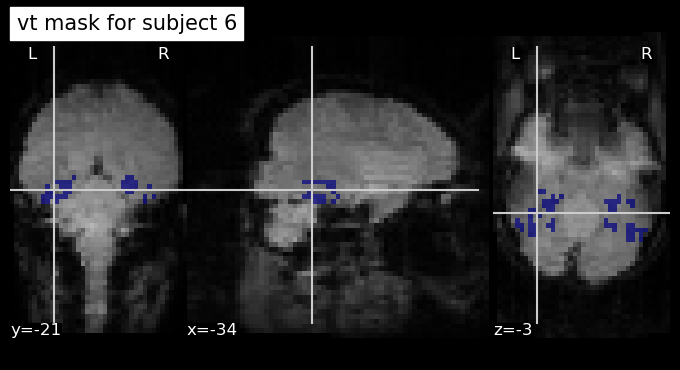

In [57]:
from nilearn.plotting import plot_roi
plot_roi(maskimg_resampled, boldimg.slicer[...,0], title='vt mask for subject %d' % subject)